In [ ]:
Case Study
Objectives:
1.Provide the learner some more practice for exploratory data analysis.
2.Equip the learner to fit and evaluate a linear regression model.

In [ ]:
Questions:
1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content 
across different cereals.
[Hint: Extract values of a specific column using their labels and use hist method of 
pyplot]


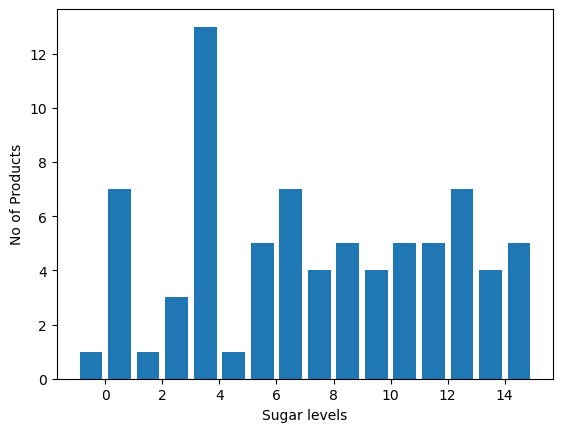

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cereal = pd.read_csv('cereal.csv')
plt.hist(cereal['sugars'],np.sort(cereal['sugars'].unique()), histtype='bar', rwidth=0.8)
plt.xlabel("Sugar levels")
plt.ylabel("No of Products")
plt.show()

In [21]:
np.sort(cereal['vitamins'].unique())

array([  0,  25, 100], dtype=int64)

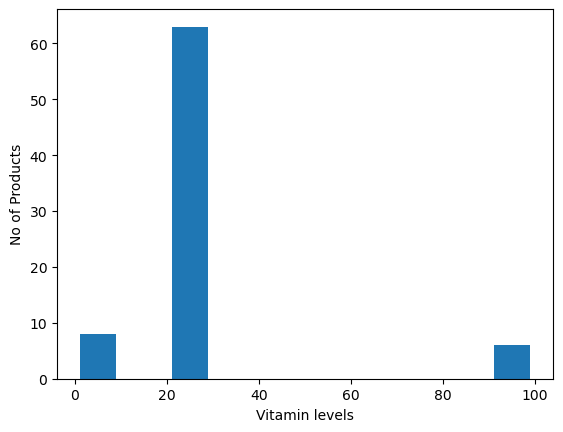

In [27]:
cereal = pd.read_csv('cereal.csv')
plt.hist(cereal['vitamins'], histtype='bar', rwidth=0.8)
plt.xlabel("Vitamin levels")
plt.ylabel("No of Products")
plt.show()

In [7]:
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
2. The names of the manufactures are coded using alphabets, create a new column 
with their full name using the below mapping.
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'
Create a bar plot where each manufacturer is on the y axis and the height of the bars 
depict the number of cereals manufactured by them.
[Hint: Try using countplot this time or bar method of pyplot

In [45]:
Manufacturers = {'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'}

cereal['Manufacturer']=np.NaN
for i in Manufacturers:
    cereal.loc[cereal['mfr']==i,['Manufacturer']]=Manufacturers[i]

In [46]:
cereal.head(25)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Raslston Purina
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,General Mills
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Kelloggs
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,General Mills
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Raslston Purina
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Post


In [ ]:
3. Extract the rating as your target variable ‘y’ and all numerical parameters as your 
predictors ‘x’. Separate 25% of your data as test set.

In [ ]:
4. Fit a linear regression module and measure the mean squared error on test 
dataset.
[ Hint: Explore linear models and metrics section of sklearn documentation